# **Doğrusal Olmayan Regresyon**

* [K-En Yakın Komşu(KNN)](#knn)
    * [Model](#knn_model)
    * [Tahmin](#knn_tahmin)
    * [Model Tuning](#knn_model_tuning)
* [Destek Vektör Regresyonu(SVR)](#svr)
    * [Model](#svr_model)
    * [Tahmin](#svr_tahmin)
    * [Model Tuning](#svr_model_tuning)
* [Doğrusal Olmayan SVR]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [Yapay Sinir Ağları(YSA)]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [Regresyon Ağaçkarı(CART)]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [Bagged Trees]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [Random Forests(RS)]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [Gradient Boosting Machines(GBM)]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [XGBoost]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [LightGBM]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()
* [CatBoost]()
    * [Model]()
    * [Tahmin]()
    * [Model Tuning]()

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# K-En yakın Komşu (KNN) <a id="knn"/>

Tahminler gözlem benzerliğine göre yapılır. (Bana arkadaşını söyle sana kim olduğunu söyleyeyim)

Parametrik olmayan bir öğrenme türüdür.

Büyük veri setlerinde performans açısından çok da iyi olduğu söylenemez ama sınıflandırma problemleri için ortaya çıkmış, daha sonra regresyon problemlerine uyarlanmıştır.

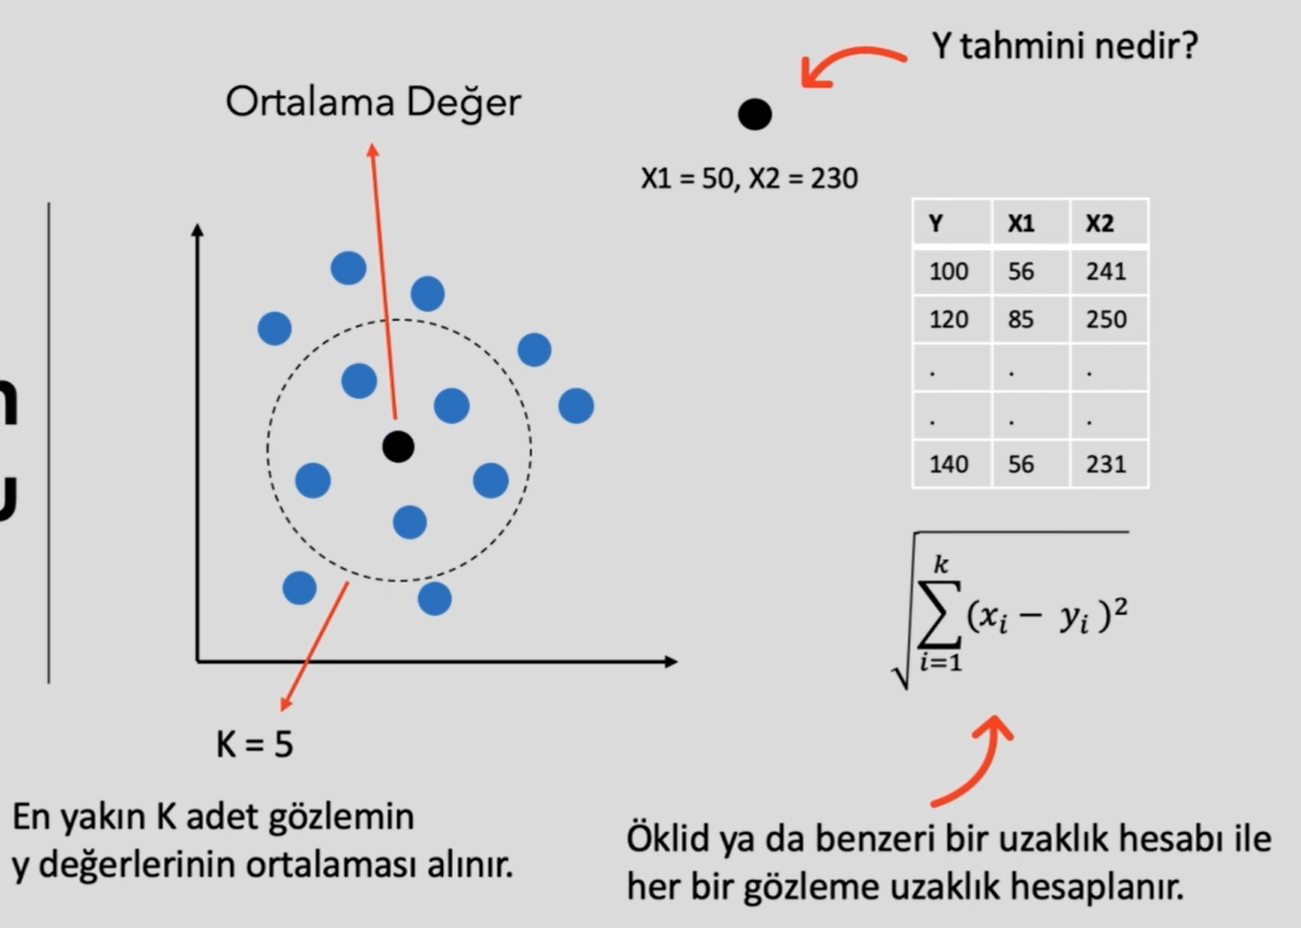


**KNN Basamakları**
* Komşu sayısını belirle(K)
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver. 

## Model <a id="knn_model"/>

In [2]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [5]:
knn_model.n_neighbors

5

## Tahmin <a id="knn_tahmin"/>

In [6]:
knn_model.predict(X_test)

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [9]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri:",rmse)

k = 1 için RMSE değeri: 0.0
k = 2 için RMSE değeri: 179.52761335480352
k = 3 için RMSE değeri: 205.20157172291863
k = 4 için RMSE değeri: 220.5139794876305
k = 5 için RMSE değeri: 239.64671325413764
k = 6 için RMSE değeri: 243.5904190007242
k = 7 için RMSE değeri: 258.1478781634636
k = 8 için RMSE değeri: 266.05374203349805
k = 9 için RMSE değeri: 269.73782093553376
k = 10 için RMSE değeri: 271.2798300436963


## Model Tuning <a id="knn_model_tuning" />

In [10]:
knn_params = {'n_neighbors': np.arange(1, 30, 1)}

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [13]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
# En iyi parametre
knn_cv_model.best_params_['n_neighbors']

8

In [16]:
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k =", k, "için RMSE değeri:",rmse, "RMSE_CV değeri:", rmse_cv)

k = 1 için RMSE değeri: 0.0 RMSE_CV değeri: 325.39475147063825
k = 2 için RMSE değeri: 179.52761335480352 RMSE_CV değeri: 293.24000183333817
k = 3 için RMSE değeri: 205.20157172291863 RMSE_CV değeri: 283.7486667487823
k = 4 için RMSE değeri: 220.5139794876305 RMSE_CV değeri: 286.3240222024089
k = 5 için RMSE değeri: 239.64671325413764 RMSE_CV değeri: 290.0705466132226
k = 6 için RMSE değeri: 243.5904190007242 RMSE_CV değeri: 298.1263115575851
k = 7 için RMSE değeri: 258.1478781634636 RMSE_CV değeri: 294.77070479194987
k = 8 için RMSE değeri: 266.05374203349805 RMSE_CV değeri: 291.98672028891235
k = 9 için RMSE değeri: 269.73782093553376 RMSE_CV değeri: 295.7162739573105
k = 10 için RMSE değeri: 271.2798300436963 RMSE_CV değeri: 301.31047022701154


In [17]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])

In [18]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [20]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# Destek Vektör Regresyonu (SVR) <a id="svr"/>

Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alınabilecek şekilde doğru ya da eğriyi belirlemektir. 

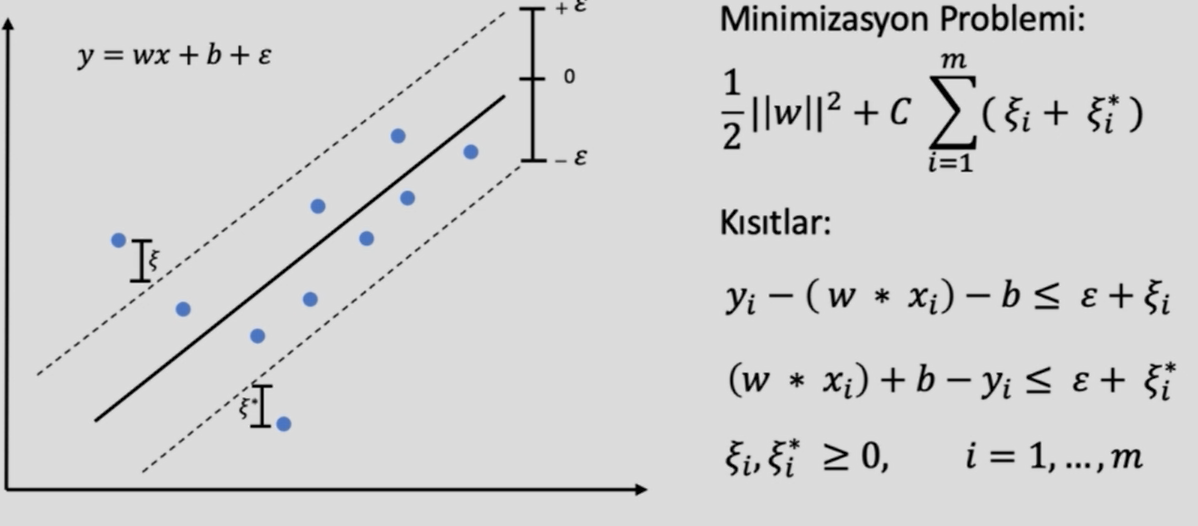

## MODEL <a id = "svr_model"/>

In [50]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [24]:
from sklearn.svm import SVR

In [25]:
svr_model = SVR("linear").fit(X_train, y_train)

In [27]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [28]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [29]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [30]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [31]:
y_pred = svr_model.predict(X_train)

**Eğer lineer model çizersek SVR'dan daha yüksek değer verdiğini görürüz(grafikte daha yukarıda bir line olacak)**

**Bunun sebebi aykırı gözlemlerin basit lineer modeli daha çok etkilemesidir.**


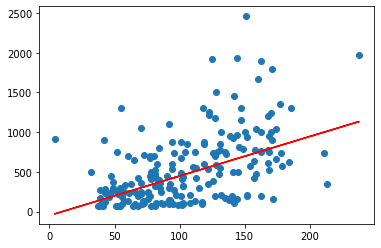

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red");

## TAHMİN <a id="svr_tahmin"/>

In [34]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [35]:
svr_model.predict([[91]])

array([403.52804878])

In [36]:
y_pred = svr_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

## Model Tuning <a id="svr_model_tuning">

In [39]:
svr_model #tune etmemiz gereken parametre c karmaşıklık parametresi

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
svr_params = {"C":np.arange(0.1, 2, 0.1)}

In [52]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10)

In [ ]:
svr_cv_model.fit(X_train, y_train)

In [43]:
svr_cv_model.best_params_

{'C': 0.1}

In [45]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [47]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [48]:
y_pred = svr_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116